In [1]:
import matplotlib.pyplot as plt
import torch
import logging


from power_perceiver.data_loader.data_loader import BatchKey
from power_perceiver.data_loader.satellite_zarr_dataset import SatelliteZarrDataset, worker_init_fn
from power_perceiver.np_batch_processor import Topography


logging.basicConfig()
_log = logging.getLogger("power_perceiver")
_log.setLevel(logging.DEBUG)

plt.rcParams["figure.figsize"] = (20, 12)

/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyresample/image.py:59: FutureWarning: Usage of ImageContainer is deprecated, please use NumpyResamplerBilinear class instead
  warnings.warn(
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-pack

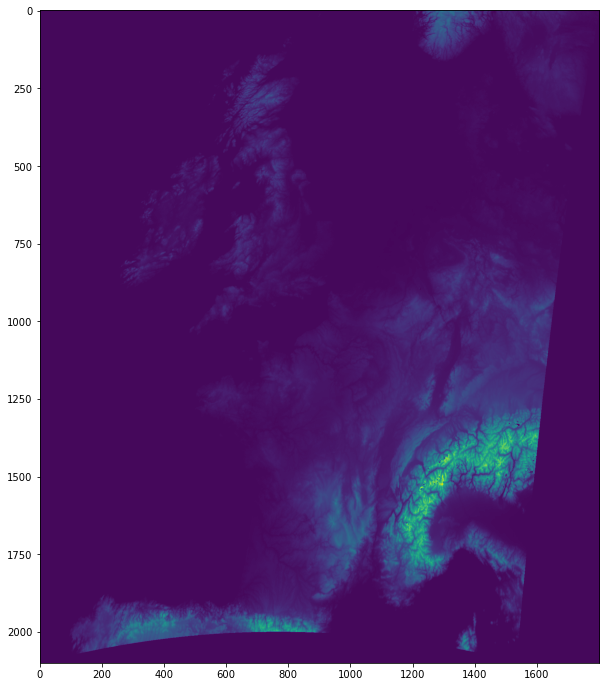

In [2]:
plt.imshow(Topography("/home/jack/europe_dem_2km_osgb.tif").topo)

In [3]:
SATELLITE_ZARR_PATH = (
    "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr")

In [4]:
torch.manual_seed(42)    

sat_dataset = SatelliteZarrDataset(
    n_days_to_load_per_epoch=1,
    satellite_zarr_path=SATELLITE_ZARR_PATH,
    np_batch_processors=[Topography("/home/jack/europe_dem_2km_osgb.tif")]
    )

sat_dataset.per_worker_init()
sat_dataset._load_random_days_from_disk()

/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyresample/image.py:59: FutureWarning: Usage of ImageContainer is deprecated, please use NumpyResamplerBilinear class instead
  warnings.warn(
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-packages/pyproj/crs/crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/jack/miniconda3/envs/power_perceiver/lib/python3.9/site-pack

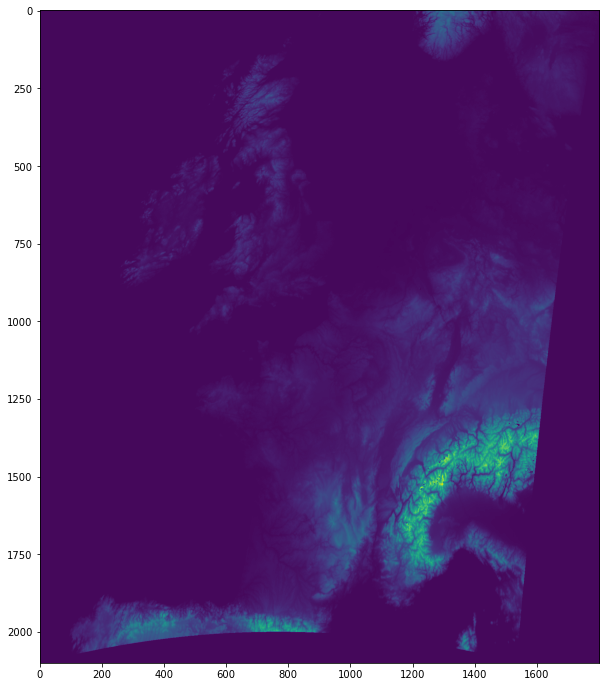

In [5]:
plt.imshow(sat_dataset.np_batch_processors[0].topo)

In [35]:
np_batch = sat_dataset._get_example()

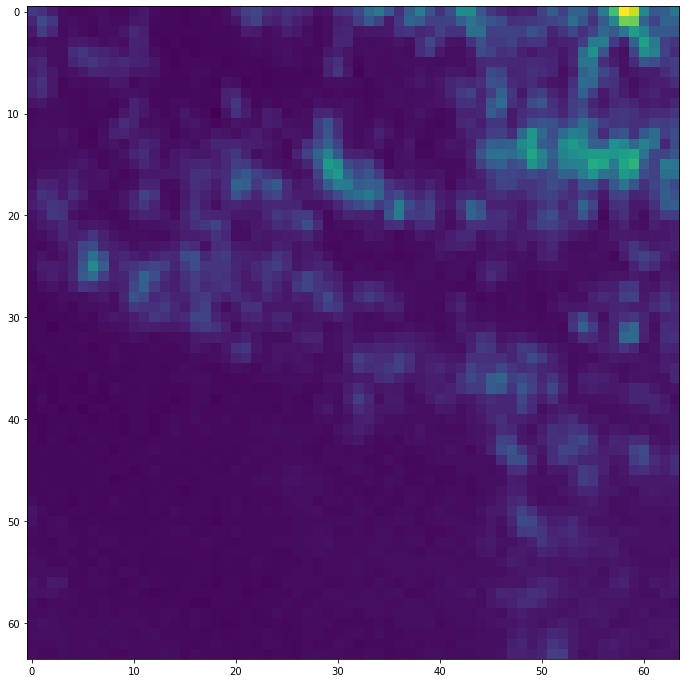

In [36]:
plt.imshow(np_batch[BatchKey.hrvsatellite][0, 0, 0])

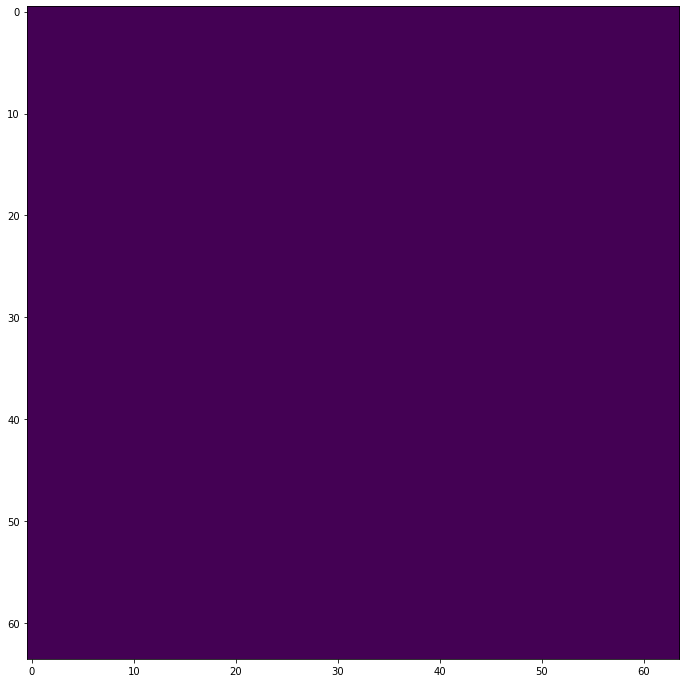

In [37]:
plt.imshow(np_batch[BatchKey.hrvsatellite_surface_height][0])

In [38]:

train_dataloader = torch.utils.data.DataLoader(
    sat_dataset,
    batch_size=32,
    num_workers=1,  # TODO: Change?
    pin_memory=False,  # TODO: Change.
    worker_init_fn=worker_init_fn,
)

In [39]:
%%time
for batch in train_dataloader:
    break

INFO:power_perceiver.data_loader.satellite_zarr_dataset:worker_id=0 has random number generator seed=6,909,045,637,428,952,499


In [8]:
batch[BatchKey.hrvsatellite].shape

torch.Size([32, 31, 1, 64, 64])